In [28]:
import pandas as pd

In [29]:
data = pd.read_csv("C:/Users/vamsh/Downloads/fruits (1).csv")

In [30]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [31]:
data.isna().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Class = le.fit_transform(data.Class)
data.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


In [33]:
from sklearn.model_selection import train_test_split
X = data[['Weight','Size']].values
y = data.Class
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

# Building the Linear SVC Classifier

In [34]:
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter("ignore")
classifier = LinearSVC()
classifier.fit(xtrain, ytrain)

LinearSVC()

In [35]:
# Calculating Training Accuracy

from sklearn.metrics import accuracy_score
train_pred = classifier.predict(xtrain)
print("Training Accuracy : ", accuracy_score(ytrain, train_pred))

Training Accuracy :  0.90625


In [37]:
# Calculating Training Accuracy

y_pred = classifier.predict(xtest)
print("Testing Accuracy : ", accuracy_score(ytest, y_pred))

Testing Accuracy :  0.875


In [38]:
# Confusion Matrix

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))

[[5 0]
 [1 2]]


In [41]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



In [42]:
# Plotting the Decision boundary of the Classifier



In [49]:
from mlxtend.plotting import plot_decision_regions


Text(0.5, 1.0, 'SVM Decision Region Boundary: ')

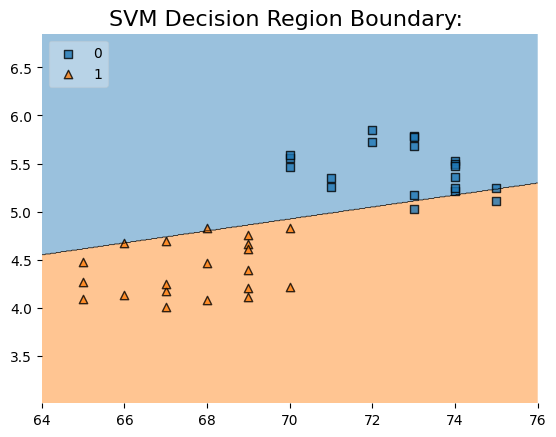

In [51]:
import numpy as np
import matplotlib.pyplot as plt
plot_decision_regions(X, np.array(y),clf=classifier,legend=2)
plt.title("SVM Decision Region Boundary: ", size=16)

([0.3333333333333333,
  0.16666666666666666,
  0.1111111111111111,
  0.08333333333333333,
  0.0625,
  0.05263157894736842,
  0.045454545454545456,
  0.04,
  0.10714285714285714,
  0.09375],
 [0.125, 0.125, 0.125, 0.125, 0.25, 0.25, 0.25, 0.125, 0.125, 0.125])

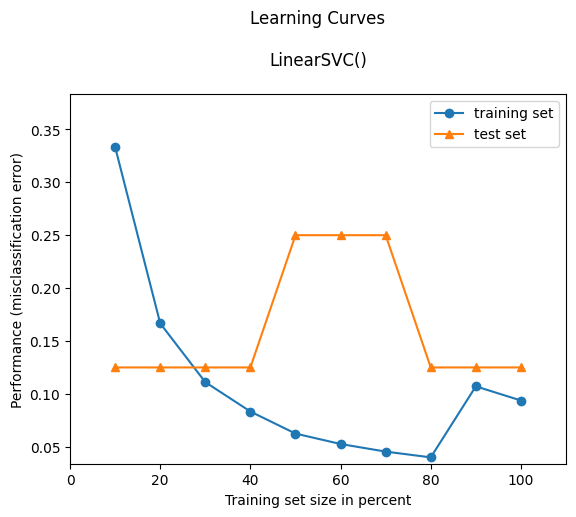

In [55]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(xtrain,ytrain,xtest,ytest,classifier,scoring='misclassification error')
# Scoring can be : Accuracy, average_precision, f1_micro, f1_macro, f1_weighted,

In [56]:
from sklearn.svm import LinearSVC, SVC
lin_svc = LinearSVC().fit(X, y)

In [61]:
# SVC with linear kernel
svc_lin = SVC(kernel='linear').fit(X, y)

# SVC with RBF kernel
rbf_svc = SVC(kernel="rbf").fit(X,y)

# SVC with polynomial (degree 3) kernel
poly_svc3 = SVC(kernel="poly", degree=3).fit(X,y)

# SVC with polynomial (degree 4) kernel
poly_svc4 = SVC(kernel="rbf", degree=4).fit(X,y)

In [62]:
# Accuracy Score



In [64]:
print("Linear SVC Score :",lin_svc.score(X,y))
print("SVC Linear Score :",svc_lin.score(X,y))
print("RBF SVC Score :",rbf_svc.score(X,y))
print("3 Degree Polynomial SVC Score :",poly_svc3.score(X,y))
print("4 Degree Ploynimal SVC Score :",poly_svc4.score(X,y))

Linear SVC Score : 0.9
SVC Linear Score : 1.0
RBF SVC Score : 0.975
3 Degree Polynomial SVC Score : 0.925
4 Degree Ploynimal SVC Score : 0.975


# Plotting the decision Boundaries

<Axes: >

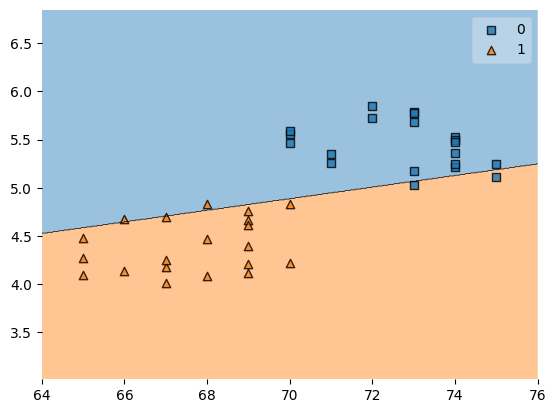

In [65]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X), y.values, lin_svc)

<Axes: >

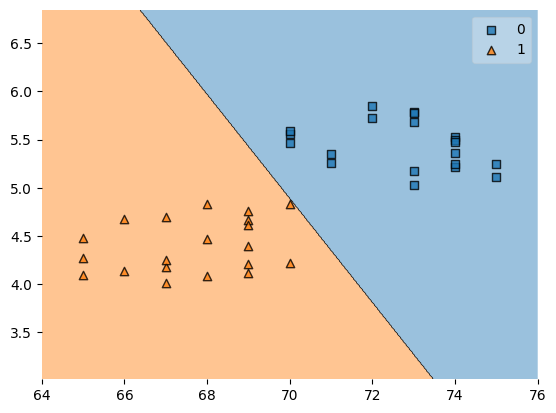

In [66]:
plot_decision_regions(np.array(X), y.values, svc_lin)

<Axes: >

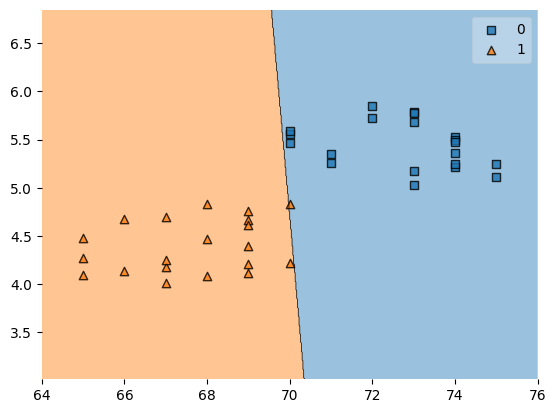

In [67]:
plot_decision_regions(np.array(X), y.values, rbf_svc)

<Axes: >

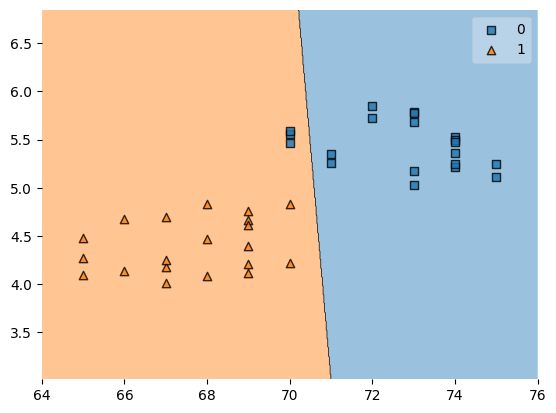

In [68]:
plot_decision_regions(np.array(X), y.values, poly_svc3)

<Axes: >

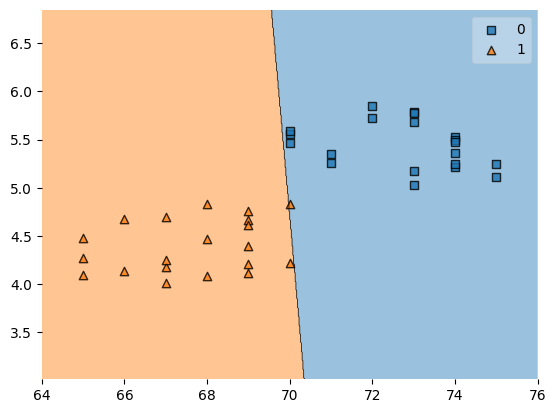

In [69]:
plot_decision_regions(np.array(X), y.values, poly_svc4)